In [3]:
import numpy as np
import matplotlib.pyplot as plt
from MOBO_SIM import BayesianOptimization

def run_multiple_optimizations(bo_function, n):
    hypervolumes = {
        'random': [],
        'qparego': [],
        'qehvi': [],
        'qnehvi': []
    }

    for _ in range(n):
        random, qparego, qehvi, qnehvi = bo_function()
        
        hypervolumes['random'].append(random)
        hypervolumes['qparego'].append(qparego)
        hypervolumes['qehvi'].append(qehvi)
        hypervolumes['qnehvi'].append(qnehvi)
    
    stats = {}
    for key in hypervolumes:
        hypervolumes[key] = np.array(hypervolumes[key])
        mean_hypervolume = np.mean(hypervolumes[key], axis=0)
        std_hypervolume = np.std(hypervolumes[key], axis=0)
        stats[key] = (mean_hypervolume, std_hypervolume)

    return stats

In [30]:
def plot_results(stats):
    plt.figure(figsize=(12, 8))
    
    for key, (mean_hypervolume, std_hypervolume) in stats.items():
        x = np.arange(len(mean_hypervolume))
        plt.errorbar(x, mean_hypervolume, yerr=std_hypervolume, label=key, capsize=5, marker='o')
    
    plt.axhline(y=59.36011874867746, color='black', linestyle='--', label='Max Hypervolume')
    
    plt.xlabel('Batch', fontsize=14)
    plt.ylabel('Hypervolume', fontsize=14)
    plt.title('Hypervolume improvement on Branin Currin', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

In [16]:
def example_bo_function():
    bo = BayesianOptimization(BATCH_SIZE=5, N_BATCH=10, INITIAL_SAMPLES=10)
    return bo.run_optimization()

In [17]:
n = 10  # Number of runs
stats = run_multiple_optimizations(example_bo_function, n)


Batch  1: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (25.80, 0.00, 2.37, 0.00), time = 29.51.
Batch  2: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (25.80, 17.73, 38.01, 14.27), time = 34.67.
Batch  3: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 37.64, 47.19, 24.50), time = 32.48.
Batch  4: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 48.39, 51.07, 33.80), time = 33.13.
Batch  5: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 50.65, 51.44, 46.52), time = 33.91.
Batch  6: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 52.31, 54.33, 52.21), time = 38.99.
Batch  7: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 52.31, 54.69, 52.91), time = 71.99.
Batch  8: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 53.39, 54.77, 55.37), time = 62.84.
Batch  9: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 53.52, 55.92, 56.11), time = 59.57.
Batch 10: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 53.52, 56.25, 56.1

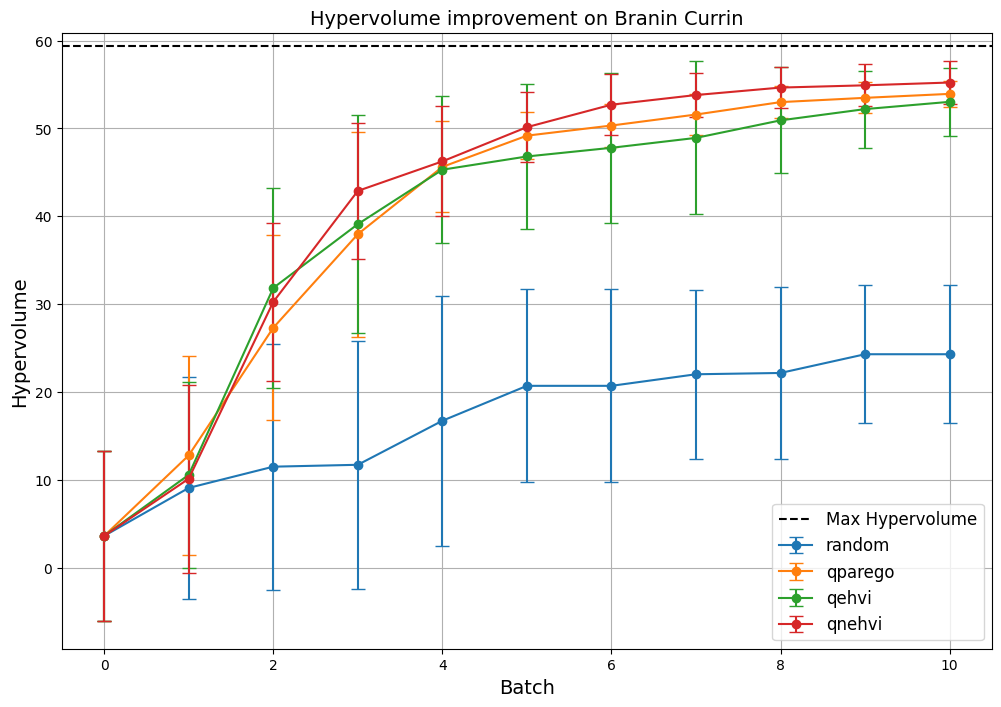

In [31]:
plot_results(stats)


In [45]:
def plot_results(stats, hv_true):
    plt.figure(figsize=(12, 8))
    
    for key, (mean_hypervolume, std_hypervolume) in stats.items():
        x = np.arange(len(mean_hypervolume))
        mean_log_hv = np.log10(hv_true - mean_hypervolume)
        std_log_hv = std_hypervolume / ((hv_true - mean_hypervolume) * np.log(10)) 
        print(std_log_hv)
        plt.plot(x, mean_log_hv, label=key, marker='o')
    
    plt.xlabel('Batch', fontsize=14)
    plt.ylabel('log10(HV_true - HV_current)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

In [10]:
def plot_results(stats, hv_true):
    plt.figure(figsize=(12, 8))
    
    for key, (mean_hypervolume, std_hypervolume) in stats.items():
        x = np.arange(len(mean_hypervolume))
        mean_log_hv = np.log10(hv_true - mean_hypervolume)
        std_log_hv = std_hypervolume / ((hv_true - mean_hypervolume) * np.log(10)) 
        print(std_log_hv)
        
        plt.errorbar(x, mean_log_hv, yerr=std_log_hv, label=key, marker='o', capsize=5)
    
    plt.xlabel('Batch', fontsize=14)
    plt.title('Log hypervolume difference on Branin Currin', fontsize=14)
    plt.ylabel('log10(HV_true - HV_current)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

[0.0752272  0.10945498 0.12712008 0.12874197 0.14493553 0.12331309
 0.12331309 0.1118391  0.11479851 0.097065   0.097065  ]
[0.0752272  0.10597362 0.14282007 0.23673168 0.16332882 0.11250445
 0.11905157 0.1328141  0.12495788 0.12962428 0.11864354]
[0.0752272  0.09440597 0.18005531 0.26528367 0.25886604 0.28618169
 0.32075085 0.36205826 0.30970909 0.26592407 0.26463811]
[0.0752272  0.09436442 0.13470273 0.20328917 0.20709628 0.18661933
 0.22738021 0.19685423 0.21338723 0.23385944 0.26067107]


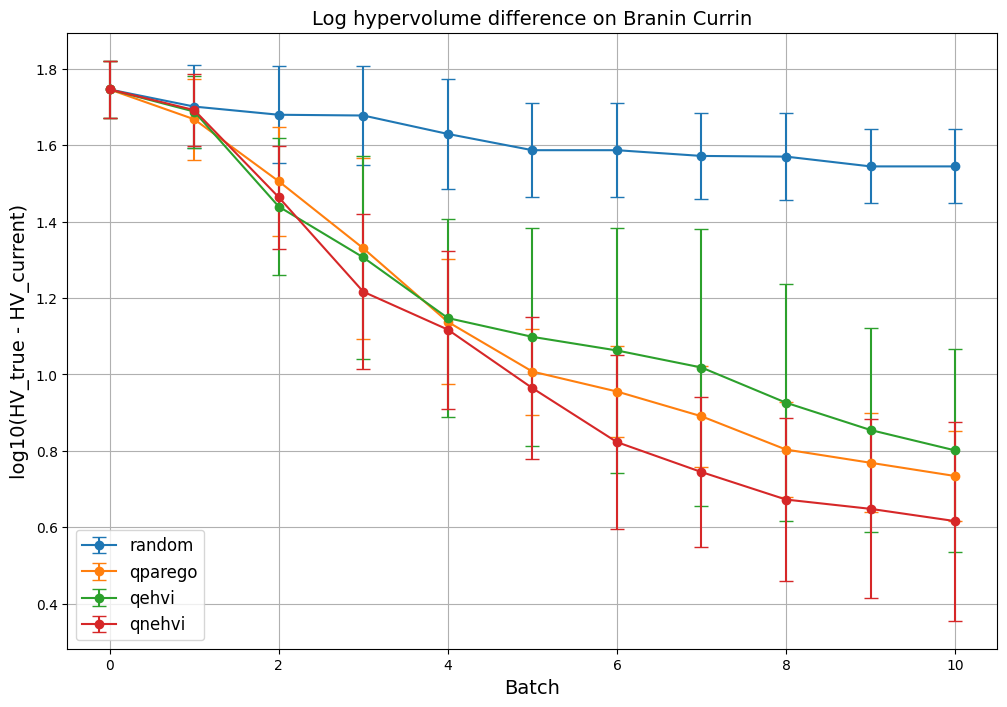

In [53]:
hv_true = 59.36011874867746
plot_results(stats, hv_true)

In [47]:
print(stats)

{'random': (array([ 3.65420752,  9.1123175 , 11.5283297 , 11.74306226, 16.75209429,
       20.72519772, 20.72519772, 22.04097252, 22.18857187, 24.3197102 ,
       24.3197102 ]), array([ 9.6492119 , 12.66392357, 14.00059473, 14.11556864, 14.21942225,
       10.96995594, 10.96995594,  9.61039063,  9.82567936,  7.83154589,
        7.83154589])), 'qparego': (array([ 3.65420752, 12.81510429, 27.32951512, 37.97433468, 45.63106401,
       49.18267784, 50.33525095, 51.58645427, 52.9993999 , 53.48618232,
       53.93656563]), array([ 9.6492119 , 11.35760163, 10.5334358 , 11.65728027,  5.16320246,
        2.63647698,  2.47395435,  2.37730916,  1.83014515,  1.75319934,
        1.48164341])), 'qehvi': (array([ 3.65420752, 10.60186862, 31.85892349, 39.11469254, 45.31107128,
       46.81499418, 47.80314118, 48.93021602, 50.92443468, 52.20436731,
       53.03120796]), array([ 9.6492119 , 10.59896043, 11.40179399, 12.36667997,  8.37409059,
        8.26670636,  8.53547657,  8.69509652,  6.01575224,  4.

In [9]:
import pandas as pd
def save_stats_to_csv(stats, filename):
    data = []
    for method, (mean_hypervolume, std_hypervolume) in stats.items():
        for i, (mean, std) in enumerate(zip(mean_hypervolume, std_hypervolume)):
            data.append([method, i, mean, std])
    
    df = pd.DataFrame(data, columns=['Method', 'Batch', 'Mean Hypervolume', 'Std Hypervolume'])
    display(df)
    df.to_csv(filename, index=False)

In [10]:
filename = 'hypervolume_data_HD.csv'
save_stats_to_csv(high_stats, filename)

,Method,Batch,Mean Hypervolume,Std Hypervolume
0,random,0,0.067288,0.036142
1,random,1,0.103460,0.025355
2,random,2,0.114217,0.025860
3,random,3,0.161014,0.024564
4,random,4,0.186400,0.023844
5,random,5,0.212823,0.016388
6,random,6,0.215731,0.017759
7,random,7,0.222752,0.019101
8,random,8,0.224123,0.018209
9,random,9,0.226182,0.015899


In [1]:
from MOBO_SIM import BayesianOptimization
from botorch.test_functions.multi_objective import DTLZ2


def bo_function():
    bo = BayesianOptimization(BATCH_SIZE= 5,N_BATCH= 10,INITIAL_SAMPLES= 10, problem=DTLZ2(dim=5,negate=True))
    return bo.run_optimization()

/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
n = 5  # Number of runs
high_stats = run_multiple_optimizations(bo_function, n)


Batch  1: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.07, 0.06, 0.03, 0.03), time = 55.10.
Batch  2: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.07, 0.06, 0.03, 0.03), time = 35.71.
Batch  3: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.12, 0.07, 0.03, 0.10), time = 27.49.
Batch  4: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.14, 0.07, 0.15, 0.17), time = 34.96.
Batch  5: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.19, 0.18, 0.15, 0.21), time = 42.02.
Batch  6: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.19, 0.21, 0.22, 0.28), time = 50.62.
Batch  7: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.20, 0.31, 0.35, 0.34), time = 61.41.
Batch  8: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.20, 0.34, 0.37, 0.37), time = 62.47.
Batch  9: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.21, 0.36, 0.39, 0.39), time = 70.62.
Batch 10: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (0.22, 0.37, 0.39, 0.40), time = 71.16.
Batch  1: Hypervolu

In [5]:
def plot_results(stats):
    plt.figure(figsize=(12, 8))
    
    for key, (mean_hypervolume, std_hypervolume) in stats.items():
        x = np.arange(len(mean_hypervolume))
        plt.errorbar(x, mean_hypervolume, yerr=std_hypervolume, label=key, capsize=5, marker='o')
    
    plt.axhline(y=0.4246018366025519, color='black', linestyle='--', label='Max Hypervolume')
    
    plt.xlabel('Batch', fontsize=14)
    plt.ylabel('Hypervolume', fontsize=14)
    plt.title('Hypervolume improvement on DTLZ2', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

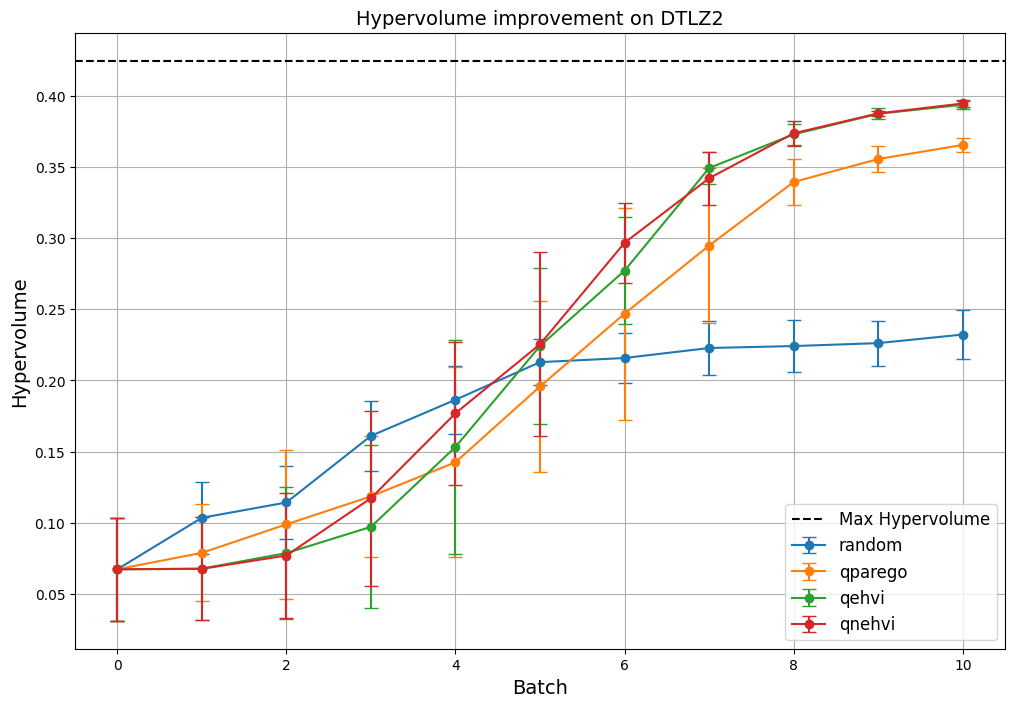

0.4246018366025519

In [6]:
plot_results(high_stats)
problem=DTLZ2(dim=5,negate=True)
problem.max_hv

In [7]:
def plot_results(stats, hv_true):
    plt.figure(figsize=(12, 8))
    
    for key, (mean_hypervolume, std_hypervolume) in stats.items():
        x = np.arange(len(mean_hypervolume))
        mean_log_hv = np.log10(hv_true - mean_hypervolume)
        std_log_hv = std_hypervolume / ((hv_true - mean_hypervolume) * np.log(10)) 
        print(std_log_hv)
        
        plt.errorbar(x, mean_log_hv, yerr=std_log_hv, label=key, marker='o', capsize=5)
    
    plt.xlabel('Batch', fontsize=14)
    plt.title('Log hypervolume difference on DTLZ2', fontsize=14)
    plt.ylabel('log10(HV_true - HV_current)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

[0.0439286  0.03428857 0.03618353 0.04047206 0.04347274 0.03360624
 0.03692583 0.04109706 0.03944539 0.03479989 0.03821705]
[0.0439286  0.04292973 0.0695514  0.06051008 0.10261592 0.11388895
 0.18177275 0.18309291 0.08182952 0.05881511 0.03440317]
[0.0439286  0.0440462  0.05850818 0.07580794 0.12055166 0.11931617
 0.11103396 0.06341112 0.06052854 0.04472511 0.0402873 ]
[0.0439286  0.04400919 0.05482741 0.08685068 0.08797336 0.14124628
 0.09530632 0.09834076 0.07500043 0.02167554 0.03185303]


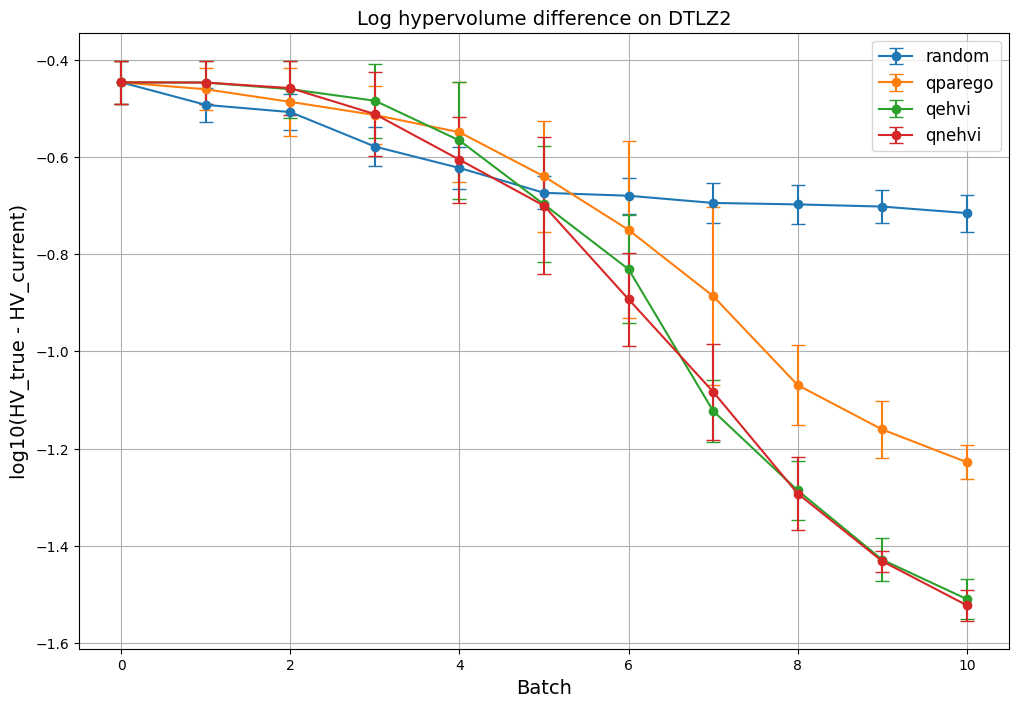

In [8]:
hv_true = 0.4246018366025519
plot_results(high_stats,hv_true)